Name - Yash Panchal

NUID - 002771456

# Abstract

The dataset I'm using is taken from Kaggle. It has about 267,000 observations (number of apps) and 13 variables(number of characteristics for each app). This information is scraped from Google Play Store. Our target variable is “Installs” (number of installation), which we consider as a proxy for the popularity of an app. The remaining 12 variables basically cover all the important information that users will pay attention to on each app in the Google app store, including category, price, ratings, reviews, version, etc. So we can predict the number of installations of an app based on them.


# Data Set 


The Data set consist of :

*   It has about 267,000 observations (number of apps) and 13 variables(number of characteristics for each app)

*   Installs column - is an Target Variable (Dependent Variable)

*   Rest 12 column acts as Independent Variable

# Importing the Libraries

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import sklearn
import random
import shap
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import numpy as np
import matplotlib.pyplot as plt
import pydot
import matplotlib.image as mpimg
import statsmodels.api as sm

# What are you doing? What is the Question

I'm implementing various data cleaning and preprocessing techniques to make the dataset ready to be used for further Analysis.

Data Cleaning is the very important task before starting with any type of analysis as it helps us to ensure that the data is consistent and accurate because it removes any type of anomalies which will have an affect in our analysis.

# Where is Data?

The data set which we will be using in our analysis is taken from Kaggle. But a source of data can be multiple like web scraping, database etc. So, it becomes very important to study the data and accoringly take the step in data cleaning.

# Importing Dataset

In [ ]:
Google_Playstore_Apps = pd.read_csv("https://raw.githubusercontent.com/panchalyash218/INFO6105/main/googleplaystore.csv")

# Reading the Data after Importing

In [ ]:
Google_Playstore_Apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Checking the number of instances and columns 

In [ ]:
Google_Playstore_Apps.shape

(10841, 13)

# Summary of all the Columns

In [ ]:
Google_Playstore_Apps.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we have just one numerical columns(Rating) and rest all columns have character value that is why we can see the mean, min, max etc for numerical columns and for rest all the columns it will show 'Nan'.

# Checking for null values and datatypes

In [ ]:
Google_Playstore_Apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Observations 

*   We have one column with float as datatype rest all are object.
*   There are some null values in Rating.
*   There are some columns like Rating, Size, Reviews which can be converted into object data type. 
 





# Dropping Unwanted Columns

We will first remove all the unwanted column which we wont be using in our Analysis this is also an very step in Data cleaning process by dropping the unwanted column we can save memory and run time decreases and also reduce noise of the data (number of columns reduces).

In [ ]:
Google_Playstore_Apps.drop(['App', 'Last Updated','Current Ver','Android Ver','Genres'], axis=1, inplace=True)

In [ ]:
Google_Playstore_Apps.head(5)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


# Converting the Datatype of the columns

Reviews column has float as data type so first we will   check if it has any values  

In [ ]:
Google_Playstore_Apps['Reviews'].str.isnumeric().sum()

10840

As seen above there are total of 10841 instance in our dataset and in column of reviews there are total of 10840 instances having numeric values so there is only one instance where value is not numeric in review column.

In [ ]:
Google_Playstore_Apps[Google_Playstore_Apps['Reviews'].str.isnumeric() == False]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10472,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN


Now, here as we can see in the reviews column there is a value '3.0M' because of which the whole row of column is given float as datatype.

As there is only one value like this so we can delete this particular row.

Copying the data set to new data frame first

In [ ]:
df = Google_Playstore_Apps.copy()

Now we will delete that particular row which have value as '3.0M' for Review column

In [ ]:
df = df.drop(df.index[10472])

In [ ]:
df[df['Reviews'].str.isnumeric() == False]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating


As we can see above that the now the value in reviews column are numeric so now we change the data type from float to int

In [ ]:
df['Reviews'] = df['Reviews'].astype(str).astype(int)

In [ ]:
df.dtypes

Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
dtype: object

As we can check the data type and see that the reviews column data type was successfully converted to int.

Now we will change the data type of size column from object to int

In [ ]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

As we can see that the Size column has value like '19M', '161k' we need to remove the M and K from the column and make the data type as int

In [ ]:
#Converting the Size column datatype from object to int64
df['Size'] = df['Size'].str.replace('M','000000',regex=True)
df['Size'] = df['Size'].str.replace('k','000',regex=True)
df['Size'] = pd.to_numeric(df.Size,errors='coerce').fillna(0).astype(np.int64)

In [ ]:
df.dtypes

Category           object
Rating            float64
Reviews             int64
Size                int64
Installs           object
Type               object
Price              object
Content Rating     object
dtype: object

We have successfully converted the data type of size from object to int

Now we will change the data type for Installs column

In [ ]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

Installs column have values like '5+', '10+' etc. so now we need to remove '+' and ',' from all the value and change the data type from object to int 

In [ ]:
#Converting the Installs column datatype from object to int64
df['Installs'] = df['Installs'].str.replace('+','',regex=True)
df['Installs'] = df['Installs'].str.replace(',','',regex=True)
df['Installs'] = pd.to_numeric(df.Installs,errors='coerce').fillna(0).astype(np.int64)

In [ ]:
df.dtypes

Category           object
Rating            float64
Reviews             int64
Size                int64
Installs            int64
Type               object
Price              object
Content Rating     object
dtype: object

Now we will check if we can convert the data type of price column

In [ ]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

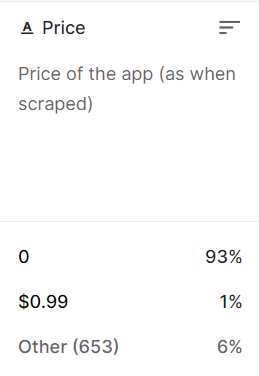

I have attached a screen shot from kaggle from where we have taken the data and the above attached screen shot gives us an idea about the distribution of values in Price column as we can see 93% of the values in the column of Price is '0'. So we can drop this column further before going for analysis if not required.

In [ ]:
df.drop(['Price'], axis=1, inplace=True)

# Now we will Implement One Hot Encoding

One Hot Encoding is basically a method where categorical column in our dataset can be converted into Numerical column.

This allows us to use categorical column in models which requires numerical input 

The one of the drawback of using the One hot Encoding is it create separate columns for every unique value present in the original column.

Lets see some example below of One Hot Encoding.

We will check if One Hot Encoding can be done on Type column

In [ ]:
df.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

As we see that there is only 3 Unique Value in Type of Column so If we do one hot encoding on this column it will create 3 separate column with '0'and '1' values in it.

In [ ]:
df = pd.get_dummies(df, columns=['Type'])

In [ ]:
df.head(5)

,Category,Rating,Reviews,Size,Installs,Content Rating,Type_Free,Type_Paid
0,ART_AND_DESIGN,4.1,159,19000000,10000,Everyone,1,0
1,ART_AND_DESIGN,3.9,967,14000000,500000,Everyone,1,0
2,ART_AND_DESIGN,4.7,87510,8,5000000,Everyone,1,0
3,ART_AND_DESIGN,4.5,215644,25000000,50000000,Teen,1,0
4,ART_AND_DESIGN,4.3,967,2,100000,Everyone,1,0


Now we will repeat the same process for Content Rating

In [ ]:
# Rename the columns by replacing spaces with underscores
df = df.rename(columns={'Content Rating': 'Content_Rating'})
# Print the updated column names
print(df.columns)

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Content_Rating',
       'Type_Free', 'Type_Paid'],
      dtype='object')


In [ ]:
df.Content_Rating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

As there is less unique values in Content_Rating Column so we can do One Hot Encoding on this column

In [ ]:
df = pd.get_dummies(df, columns=['Content_Rating'])

In [ ]:
df.head(5)

,Category,Rating,Reviews,Size,Installs,Type_Free,Type_Paid,Content_Rating_Adults only 18+,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated
0,ART_AND_DESIGN,4.1,159,19000000,10000,1,0,0,1,0,0,0,0
1,ART_AND_DESIGN,3.9,967,14000000,500000,1,0,0,1,0,0,0,0
2,ART_AND_DESIGN,4.7,87510,8,5000000,1,0,0,1,0,0,0,0
3,ART_AND_DESIGN,4.5,215644,25000000,50000000,1,0,0,0,0,0,1,0
4,ART_AND_DESIGN,4.3,967,2,100000,1,0,0,1,0,0,0,0


As we can see from the above output that we have successfully implemented One Hot Encoding on the columns.

Now we will check if we can do One hot encoding for Category Column

In [ ]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

Now as there are lot of unique value in Category Column so to implement One Hot Encoding wont be the Optimized way to go as it will increase the run time of our notebook as well as it can also lead to overfitting if we have lot of columns and sample size is small

# Now we will implement catcoding 

Now as we show there are certain limitation to One Hot Encoding to overcome the limitation we use Cat.coding. 

This process is basically used for categorical columns. So the Unique values in the column of character column will be incremented by integer value starting from zero.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [ ]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

As we see there are lot of unique values in Category Column so we will implement Cat Coding

In [ ]:
##############CAT CODES for CATEGORY##########################
df['CategoryCode'] = df['Category'].astype('category').cat.codes

In [ ]:
df.drop(['Category'], axis=1, inplace=True)

In [ ]:
df.head(5)

,Rating,Reviews,Size,Installs,Type_Free,Type_Paid,Content_Rating_Adults only 18+,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated,CategoryCode
0,4.1,159,19000000,10000,1,0,0,1,0,0,0,0,0
1,3.9,967,14000000,500000,1,0,0,1,0,0,0,0,0
2,4.7,87510,8,5000000,1,0,0,1,0,0,0,0,0
3,4.5,215644,25000000,50000000,1,0,0,0,0,0,1,0,0
4,4.3,967,2,100000,1,0,0,1,0,0,0,0,0


# We will check the updated Summary, Datatype and Instance of our dataset after data cleaning process

In [ ]:
df.shape

(10840, 13)

In [ ]:
df.describe(include='all')

,Rating,Reviews,Size,Installs,Type_Free,Type_Paid,Content_Rating_Adults only 18+,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated,CategoryCode
count,9366.000000,1.084000e+04,1.084000e+04,1.084000e+04,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000
mean,4.191757,4.441529e+05,1.651624e+07,1.546434e+07,0.926107,0.073801,0.000277,0.803875,0.038192,0.046033,0.111439,0.000185,16.725369
std,0.515219,2.927761e+06,2.320041e+07,8.502936e+07,0.261609,0.261458,0.016634,0.397083,0.191668,0.209567,0.314690,0.013583,8.353310
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,3.800000e+01,3.000000e+00,1.000000e+03,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,4.300000,2.094000e+03,2.675000e+05,1.000000e+05,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,14.000000
75%,4.500000,5.477550e+04,2.600000e+07,5.000000e+06,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rating                          9366 non-null   float64
 1   Reviews                         10840 non-null  int64  
 2   Size                            10840 non-null  int64  
 3   Installs                        10840 non-null  int64  
 4   Type_Free                       10840 non-null  uint8  
 5   Type_Paid                       10840 non-null  uint8  
 6   Content_Rating_Adults only 18+  10840 non-null  uint8  
 7   Content_Rating_Everyone         10840 non-null  uint8  
 8   Content_Rating_Everyone 10+     10840 non-null  uint8  
 9   Content_Rating_Mature 17+       10840 non-null  uint8  
 10  Content_Rating_Teen             10840 non-null  uint8  
 11  Content_Rating_Unrated          10840 non-null  uint8  
 12  CategoryCode                    

As we can see that there are some null values in Rating column so will replace the null values with '0'

In [ ]:
df['Rating'] = df['Rating'].fillna(0)

In [ ]:
df.isnull().sum()

Rating                            0
Reviews                           0
Size                              0
Installs                          0
Type_Free                         0
Type_Paid                         0
Content_Rating_Adults only 18+    0
Content_Rating_Everyone           0
Content_Rating_Everyone 10+       0
Content_Rating_Mature 17+         0
Content_Rating_Teen               0
Content_Rating_Unrated            0
CategoryCode                      0
dtype: int64

 Now as we can see there is no Null values in any columns of our dataset

# Check the likely Distribution 



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



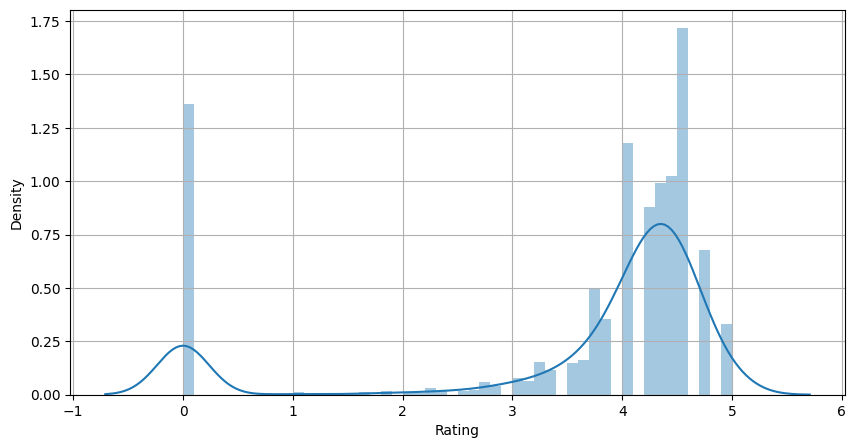



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



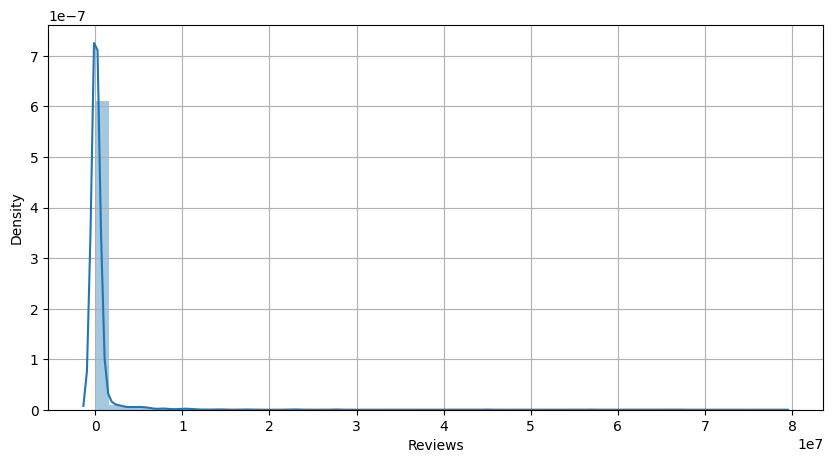



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



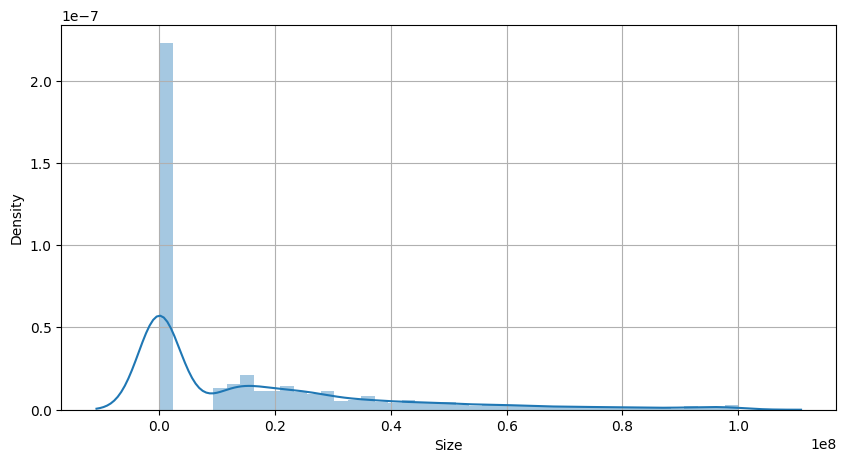



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



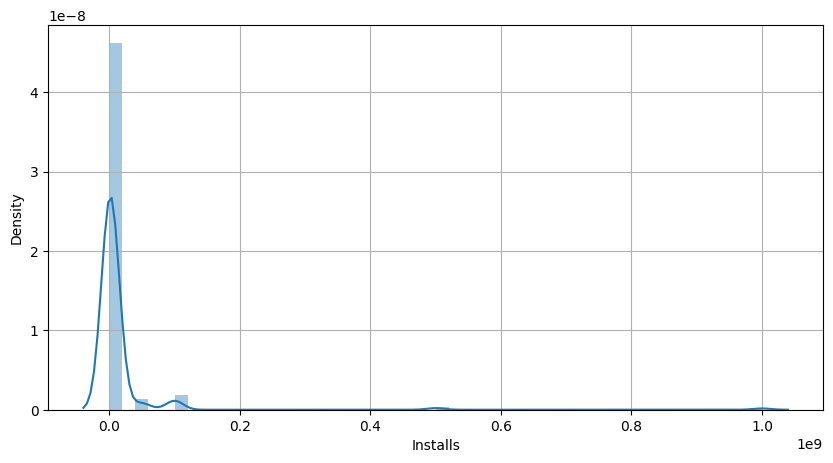



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



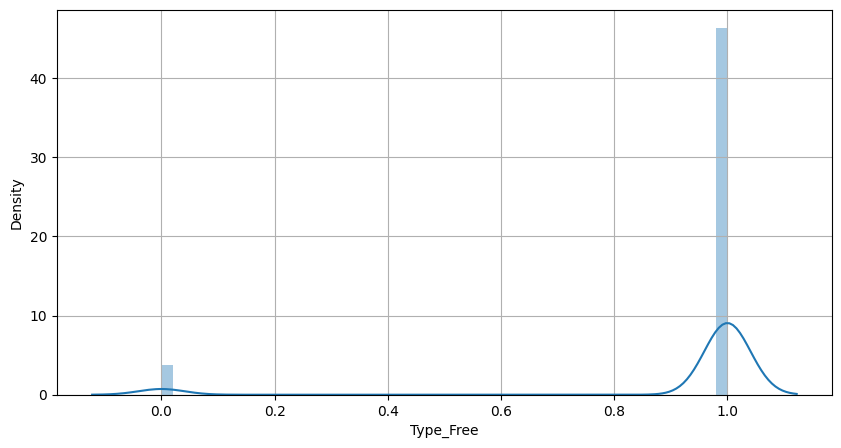



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



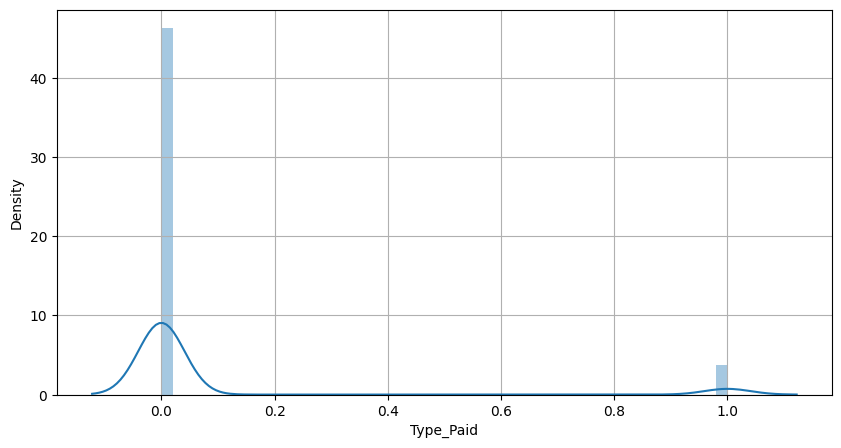



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



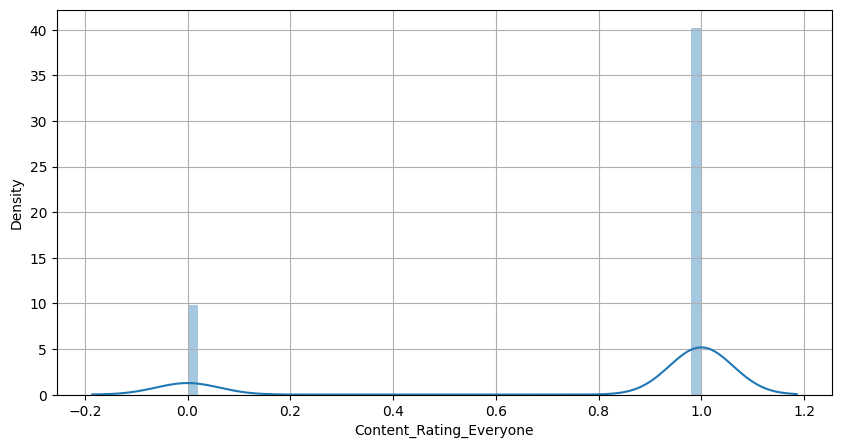



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



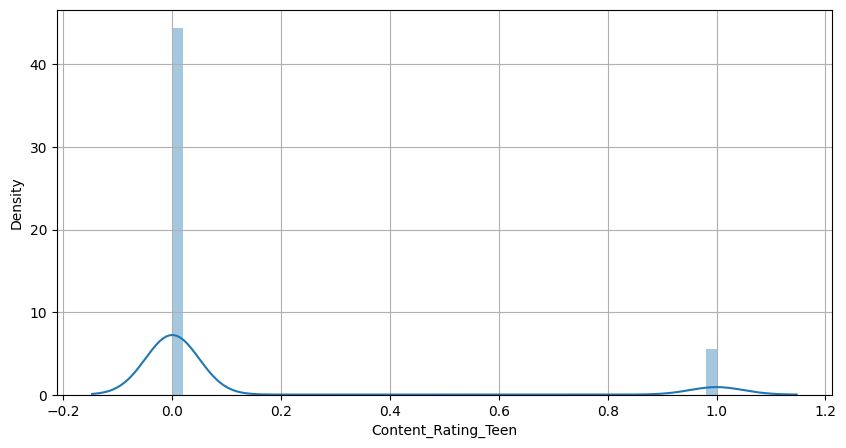



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



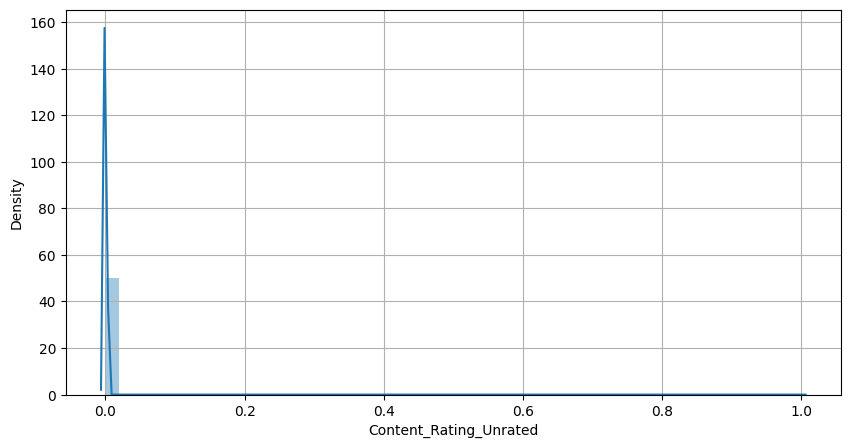



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



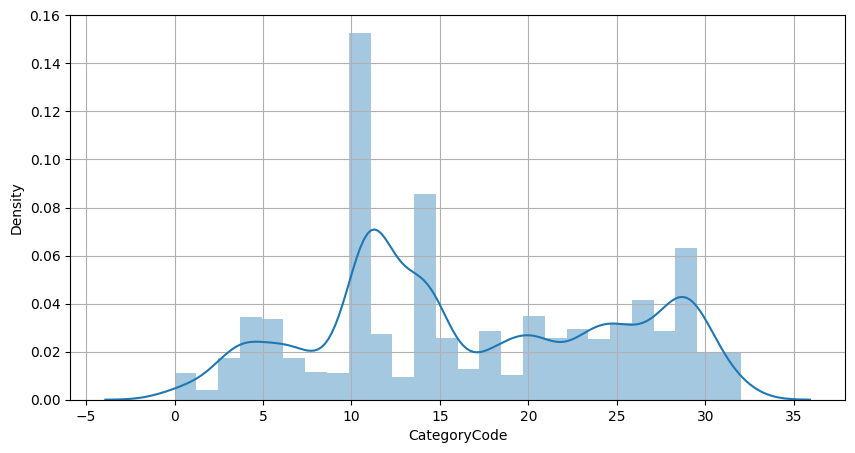

In [ ]:
List =['Rating','Reviews','Size','Installs','Type_Free','Type_Paid','Content_Rating_Everyone','Content_Rating_Teen','Content_Rating_Unrated','CategoryCode']
def distribution(data,list):
  sns.distplot(data[list])
  plt.show()
for i in List:
  plt.grid(True)
  distribution(df,i)
  plt.show()

# Correlation between the attributes

<Axes: >

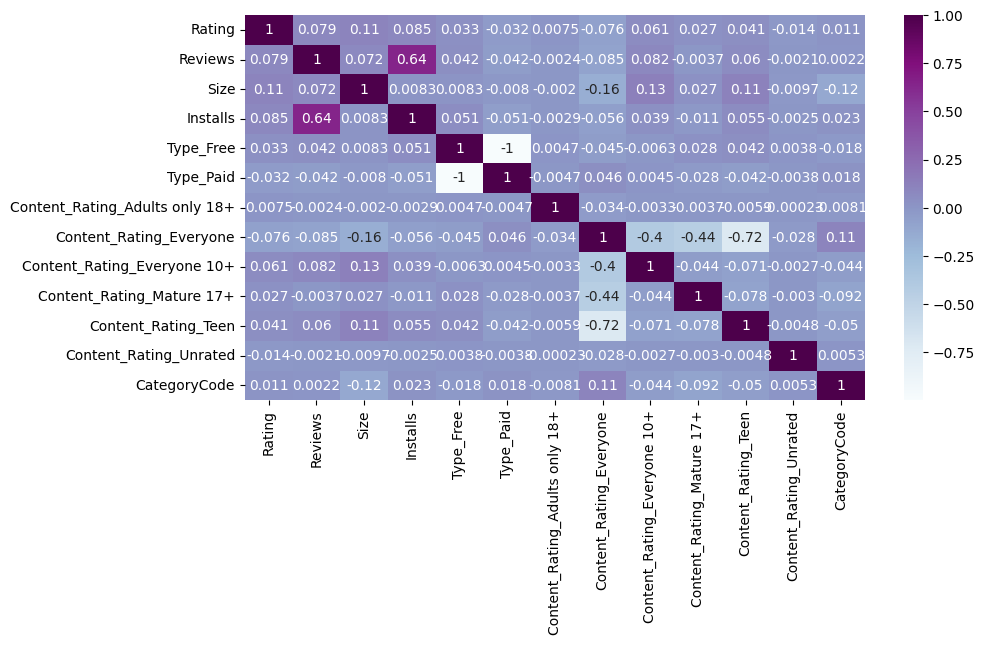

In [ ]:
plt.rcParams["figure.figsize"] = (10, 5)
sns.heatmap(
    df.corr(), annot=True, cmap="BuPu"
)  # Heatmap showing correlation between the attributes.

From the above heatmap we can conclude that highest correlation between the attributes is between Installs and Reviews = 0.64

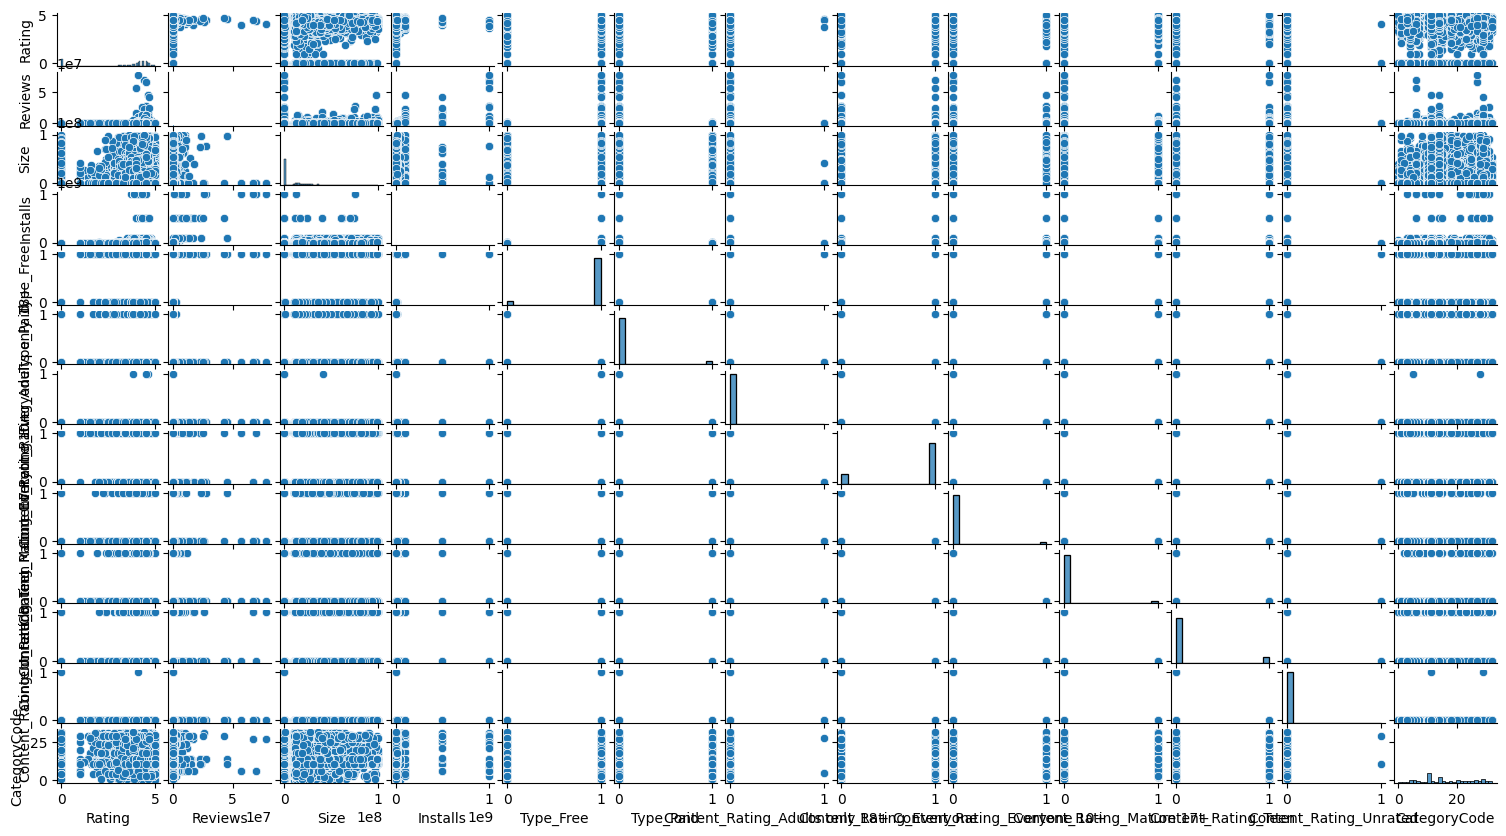

In [ ]:
# All attributes are plotted against each other to see the pattern of distribution
g = sns.pairplot(df)
g.fig.set_size_inches(15,8)

The above plot helping us to understand the pairwise relationship in our dataset

# Spliting Training and Testing Columns

We will split our dataset in Test and Train for further analysis

In Y-axis we will have out Target variable(i.e Installs) and rest all columns will be in X-axis

In [ ]:
X = df.drop(["Installs"], axis=1)  # Training Feature
Y = df["Installs"]  # Target

In [ ]:
print(X.head())

   Rating  Reviews      Size  Type_Free  Type_Paid  \
0     4.1      159  19000000          1          0   
1     3.9      967  14000000          1          0   
2     4.7    87510         8          1          0   
3     4.5   215644  25000000          1          0   
4     4.3      967         2          1          0   

   Content_Rating_Adults only 18+  Content_Rating_Everyone  \
0                               0                        1   
1                               0                        1   
2                               0                        1   
3                               0                        0   
4                               0                        1   

   Content_Rating_Everyone 10+  Content_Rating_Mature 17+  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0 

In [ ]:
print(Y.head())

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64


The data was splitted into Training ad Testing Data into 90% and 10% respectively.

In [ ]:
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(  # Splitting Data into Training and Test
    X, Y, test_size=0.1, random_state=42
)
x_train_100 = shap.utils.sample(
    x_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    x_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process

# Fitting a Linear Model

In [ ]:
linear_model = sklearn.linear_model.LogisticRegression()  # Initializing a Linear Model
linear_model.fit(x_train, y_train)  # Training a linear model

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

As our data set had some categorical columns before applying one hot encoding and cat coding Logistic regression model will fit our data set

In [ ]:
#Scaling the data using Min-Max scaling for the purpose of evaluating Co-efficients, as non scaled data may mislead while we evaluate the co-efficients
new_df  = df.drop("Installs", axis=1)
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm = pd.concat((df_norm, df.Installs), 1)

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.


we are doing scaling basically by this we are making our data points generalized so that the distance between them will be lower.

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

# model = sm.OLS(y_train['Installs'], x_train[[ 'CategoryCode','Rating', 'Size', 'Reviews', 'Price','Type_0','Type_Free','Type_Paid','Content_Rating_Everyone','Content_Rating_Teen','Content_Rating_Unrated']]).fit()
model = sm.OLS(y_train, x_train).fit()
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Installs   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     632.8
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:29:40   Log-Likelihood:            -1.8948e+05
No. Observations:                9756   AIC:                         3.790e+05
Df Residuals:                    9744   BIC:                         3.791e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Rating                          2.121e+06   4.46e+05      4.761      0.000    1.25e+06    2.99e+06
Reviews                           19.2500      0.235     82.042      0.000      18.790      19.710
Size                              -0.1475      0.030     -4.966      0.000      -0.206      -0.089
Type_Free                      -2.756e+06    6.6e+07     -0.042      0.967   -1.32e+08    1.27e+08
Type_Paid                      -1.015e+07   6.61e+07     -0.154      0.878    -1.4e+08    1.19e+08
Content_Rating_Adults only 18+ -5.943e+06   8.08e+07     -0.074      0.941   -1.64e+08    1.52e+08
Content_Rating_Everyone         2.837e+06    6.6e+07      0.043      0.966   -1.27e+08    1.32e+08
Content_Rating_Everyone 10+    -1.406e+06   6.59e+07     -0.021      0.983   -1.31e+08    1.28e+08
Content_Rating_Mature 17+      -4.695e+05   6.61e+07     -0.007      0.994    -1.3e+08    1.29e+08
Content_Rating_Teen             7.506e+06    6.6e+07      0.114      0.909   -1.22e+08    1.37e+08
Content_Rating_Unrated         -4.135e+06   8.08e+07     -0.051      0.959   -1.63e+08    1.54e+08
CategoryCode                    1.278e+05   8.11e+04      1.575      0.115   -3.12e+04    2.87e+05
==============================================================================
Omnibus:                    14836.466   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7386954.093
Skew:                           9.514   Prob(JB):                         0.00
Kurtosis:                     136.454   Cond. No.                     8.01e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# P-Values
If the p-value is 0.05 or lower, the result is trumpeted as significant, but if it is higher than 0.05, the result is non-significant

Reviews

Size

Rating


These variables have P-Value less that 0.05, hence it can be interpreted that these variables are significant variables and any change to this variables have significant impact on the target (Installs).

# Skew and Kurtosis

Skewness tells us the amount and direction of skew(Departure from the central axis) and Kurtosis tells us how tall and sharp the central peak is. The optimum value for these two measures is 0, in our case we have a value for Skew and Kurtosis as 9.514, 136.454 respectively.

# Durbin-Watson

The Durbin-Watson test is a statistical test to detect auto-correlation in the residuals of a regression analysis. Its range is 0 to 4.

Value of 2 indicates that no auto correlation is detected

Value between 0 to 2 indicates that there is positive auto correlation detected

Value between 2 to 4 indicates that there is negative auto correlation detected

Our model has a DW score of 1.997 which could be interpreted as a Positive auto-correlation in the residuals of regression.

# Jarque-Bera Test

The JB test is known as the test of Normality, irrespective if the data has skew or kurtosis. If it is far from zero, it signals the data do not have a normal distribution. Our JB value is 7386954.093 which again re-inforces the interpretation we got from Skew and Kurtosis.

# Fit Tree Based Model

As, I trying using RandomForestRegressor model in my dataset but the squared_error value came out very vague so below I'm also showing decisiontree and gradientboosting classifier method to show the best accuracy for my dataset and as we can see below Decision Tree classifier gives us the best accuracy of 48.80%

In [ ]:
# Create a Decision Tree Classifier model
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 48.80%


In [ ]:
# Create a Gradient Boosting Classifier model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 56.46%


In [ ]:
# Setting the max_dept to 3 for the purpose of ease of explainbility and readability
tree_model = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=10)
tree_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=0)

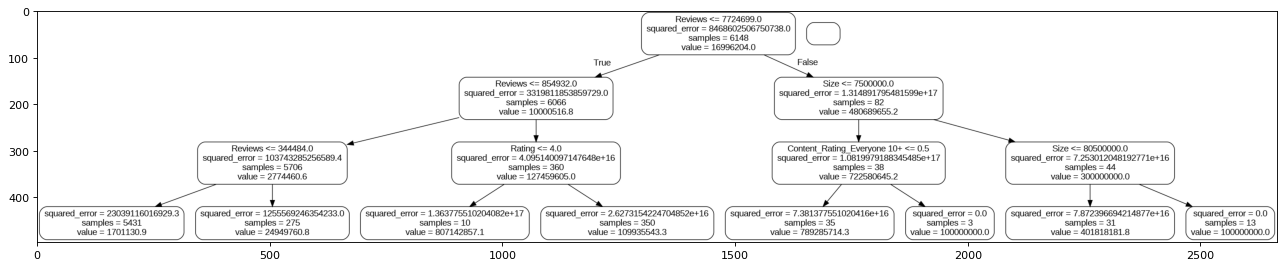

In [ ]:
# Visualization of Nodes for the purpose of explainability
figure(figsize=(20, 24), dpi=80)
tree = tree_model.estimators_[0]
export_graphviz(
    tree,
    out_file="tree.dot",
    feature_names=list(x_train.columns),
    rounded=True,
    precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

# What Approaches we have taken?

1. I have started with checking the data type our data and listed out the columns whoes data type can be changed.

2. Removed the unwanted columns which where not required in our Analysis.

3. Did some cleaning in some columns and change the data type to int(Size and Installs)

4. Implemented One hot encoding in categorical columns so that the columns can be used in model where input numerical is required.

5. Implemented Cat Coding in one column(Category) as it had many unique values and One hot encoding was not very optimized method.



# Evaluation?

We saw the distribution plot, pairplot, heat map for checking the relations between our attributes.

We splitted our data into test and train and also implement ols model to check which attribute had significant influence on our target variable.

We also show which tree based model best fitted our dataset

# References

Chatgpt

Kaggle

https://colab.research.google.com/drive/1InvlVXPRxmcWtP_ISkwLosChpb68FaIJ

geeksforgeeks

https://colab.research.google.com/drive/1HBu35k55SiL6yD0B4cIkq8jVr44f6VJ2

# MIT License

Copyright (c) 2023 Yash Panchal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE